# 머신러닝

데이터 출처 : https://www.kaggle.com/datasets/dipam7/student-grade-prediction?resource=download 후처리

데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p1.csv

데이터 설명 : 학생의 다양한 주변 환경에 따른 결석 등급 (absences)

sex : 성별 (F : 여성 / M :남성)

age : 나이

pstatus : 부모와 동거 유무 (T : 동거중 , A : 별거)

medu : 어머니 교육(0 - 없음, 1 - 초등 교육(4학년), 2 - 5~9학년, 3 - 중등 교육 또는 4 - 고등 교육)

fedu : 아버지 교육(0 - 없음, 1 - 초등 교육(4학년), 2 - 5 - 9학년, 3 - 중등 교육 또는 4 - 고등 교육)

guardian : 학생의 보호자 ('mother', 'father', 'other')

traveltime : 집에서 학교까지 이동 시간(1 - <15분, 2 - 15 - 30분, 3 - 30분 - 1시간, 또는 4 - >1시간)

studytime : 주간 학습 시간(1 - <2시간, 2 - 2 - 5시간, 3 - 5 - 10시간 또는 4 - >10시간)

failures : 과거 클래스 실패 수(n if 1<=n<3, 그렇지 않으면 4)

freetime : 방과 후 자유 시간(숫자: 1 - 매우 낮음에서 5 - 매우 높음)

famrel : 가족 관계의 질(숫자: 1 - 매우 나쁨에서 5 - 훌륭함)

absences : 학교 결석 횟수등급 (0~5, 높은 숫자일수록 많은 결석 횟수)

In [53]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p1.csv")
df.head()

,sex,age,pstatus,medu,fedu,guardian,traveltime,studytime,failures,freetime,famrel,absences
0,F,18,A,4,4,mother,2,2,0,3,4,2
1,F,17,T,1,1,father,1,2,0,3,5,1
2,F,15,T,1,1,mother,1,2,3,3,4,3
3,F,15,T,4,2,mother,1,3,0,2,3,0
4,F,16,T,3,3,father,1,2,0,3,4,1


### 1-1 EDA를 진행하고 (+시각화) , 차원축소의 필요성이 있는지 확인 (5점)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   pstatus     395 non-null    object
 3   medu        395 non-null    int64 
 4   fedu        395 non-null    int64 
 5   guardian    395 non-null    object
 6   traveltime  395 non-null    int64 
 7   studytime   395 non-null    int64 
 8   failures    395 non-null    int64 
 9   freetime    395 non-null    int64 
 10  famrel      395 non-null    int64 
 11  absences    395 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 37.2+ KB


1단계: 데이터 불러오기 및 기본 정보 확인 - pd.read_Csv(), head().shape, info(), deceribe,

2단계: 결측치 확인 및 처리 - df.isnull().sum(), df.fillna()

3단계: 데이터 분포 확인: plt.hist(df['DBP'], bins=20), boxplot,

4단계: 이상치 확인 및 처리 - iqr, zcore

5단계: 변수 간의 관계 확인 - df.corr(), sns.heatmap, fairplot 상관관계분석, 상관관계시각화

            count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
absences    395.0   1.377215  1.555076   0.0   0.0   1.0   3.0   4.0


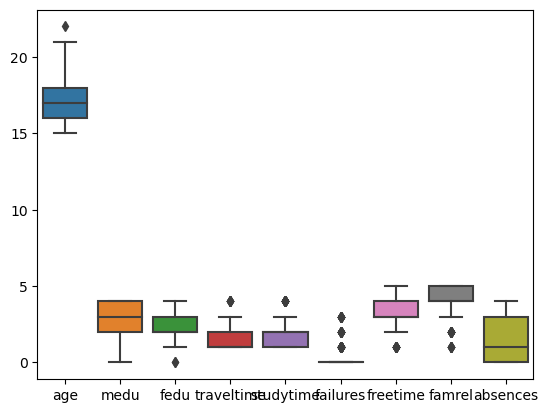

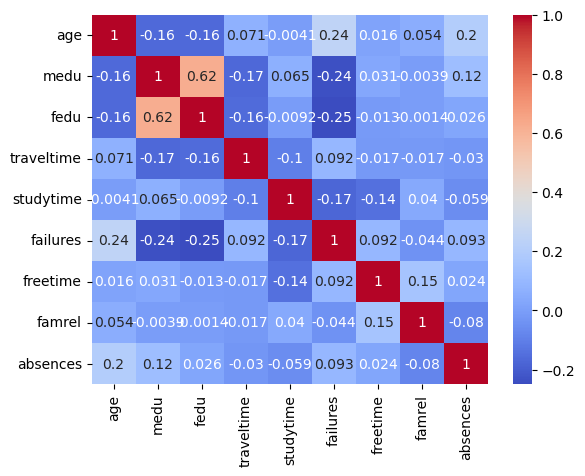

In [62]:
df.shape  # (395, 12)
print(df.describe().T)
# df['guardian'].unique()  'mother', 'father', 'other'
df.isnull().sum() #결측치 없음 확인

import seaborn as sns
import matplotlib.pyplot as plt

# ■ 박스플롯 
sns.boxplot(df)
plt.show() 

# 숫자형 변수 상관관계 히트맵 생성 df.corr() 
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()  # 그래프 출력

# ■ 히트맵 결과 해석
# failures (과거 클래스 실패 수) 변수가 absences (결석 횟수)와 높은 양의 상관관계를 보임. 
# 즉, 과거에 많이 실패한 학생일수록 결석을 많이 하는 경향이 있음.

# studytime (주간 학습 시간) 변수와 failures 변수는 음의 상관관계를 보임. 
# 즉, 학습 시간이 길수록 과거에 실패한 횟수가 적음.

# famrel (가족 관계의 질) 변수와 absences 변수는 약한 음의 상관관계를 보임. 
# 즉, 가족 관계가 좋을수록 결석을 덜 하는 경향이 있음.

# 다른 변수들 간의 상관관계는 크지 않음.

# ■ 차원축소의 필요성
# 변수의 수가 적음: 12개의 변수는 비교적 적은 수이므로, 차원 축소를 통해 얻는 이점이 크지 않을 수 있습니다.
# 명확한 상관관계: failures와 absences 사이의 강한 상관관계처럼, 변수 간의 관계가 명확하게 드러나므로, 
# 추가적인 차원 축소는 불필요할 것으로 판단

### 1-2 데이터 품질 개선을 위한 방법이 있는지 찾고 데이터셋을 재생성하라 (5점)

In [63]:
# 이상치 검출 및 제거
df = df[df['absences'] >= 0]

# 범주형 변수 인코딩
df = pd.get_dummies(df, columns=['sex', 'pstatus', 'guardian'])

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'famrel', 'absences']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# df.isnull().sum()

### 1-3 1.2에서 제시한 방법이 데이터 과적합이 된다는 가정하에 어떻게 해결할 수 있을지 2가지 개선안 제시, 각방법들의 장단점 기술 (10점)

데이터 과적합은 '정규화'와 '교차검증'으로 해결

1.정규화 (Regularization)
정규화는 모델의 복잡성을 줄이기 위해 가중치에 패널티를 추가.(L1(Lasso), L2(Ridge) 사용)

장점:
모델의 일반화 성능을 향상 가능
과적합을 방지하면서도 중요한 특징을 유지가능

단점:
정규화 강도를 잘 조정해야 하며, 과도한 정규화는 과소적합을 초래할 수 있음(underfitting)
하이퍼파라미터 튜닝이 필요해 추가적인 계산 비용이 발생할 수 있습니다.

2.교차 검증 (Cross-Validation)
데이터를 여러 개의 서브셋으로 나누어 모델을 훈련하고 평가하는 방법 (k-fold cross validation 주로 사용)

장점:
모델의 성능을 보다 정확하게 평가할 수 있어 과적합을 조기에 발견가능
훈련 데이터의 변동성에 영향을 덜 받음

단점:
계산 비용이 높아져 훈련 시간이 길어질 수 있음
작은 데이터셋에서는 여전히 과적합이 발생할 가능성이 있음

### 2-1
1-2 데이터셋을 기준으로 random forest, neural network , lightgbm 3가지 방식으로 학교 결석 횟수등급을 예측하는 모델을 만들어라, f1 score로 모델을 평가하라 (5점)

In [85]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p1.csv")
df.head()

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
# import lightgbm as lgb  
# AttributeError: module 'pandas.core.strings' has no attribute 'StringMethods' 오류때문에 제외함;;
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
# from lightgbm import LGBMClassifier  
from sklearn.preprocessing import StandardScaler

# 이상치 검출 및 제거
df = df[df['absences'] >= 0]

# 범주형 변수 인코딩
df = pd.get_dummies(df, columns=['sex', 'pstatus', 'guardian'])

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'famrel', 'absences']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# 타겟 변수 생성: 결석 등급
df['absence_category'] = pd.cut(df['absences'], bins=[-1, 0, 5, 10, 20, float('inf')],
                                  labels=[0, 1, 2, 3, 4])  # 결석 등급 나누기

# 특징과 타겟 변수 준비
X = df.drop(columns=['absences', 'absence_category'])
y = df['absence_category']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500),
#     "LightGBM": lgb.LGBMClassifier(random_state=42)
}

# 모델 훈련 및 평가
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습
    y_pred = model.predict(X_test)  # 예측
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1 점수 계산
    f1_scores[name] = f1

# F1 점수 출력
for name, score in f1_scores.items():
    print(f"{name} F1 Score: {score:.4f}")
    
# Random Forest F1 Score: 0.6159
# Neural Network F1 Score: 0.6310

Random Forest F1 Score: 0.6159
Neural Network F1 Score: 0.6310


### 2-2 hard voting, soft voting에 대한 장단점을 설명하고 2-1의 3가지 모델로 구현하라. 두 방식의 f1-score를 비교하라 (10점)

### 2-3 총 5개 모델(RF, NN, LGBM, 하드보팅, 소프트보팅) 중 실시간 온라인 시스템에 가장 적합한 모델과 선정이유를 객관적으로 제시하라 (5점)

### 3-1 적정 모델과 선정 및 모델링 과정에서 추가적으로 고려해볼 만한 사항은? (5점)

### 3-2 모델을 학교 시스템에 적용하여 활용하려한다. 모델 적용 및 운영과정에서 고려해볼 만한 사항? (5점)

# 통계분석

## 4번문제
데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p4_.csv

status : 생존 여부 (death: 죽음 / event lost: 생존)

company : 회사구분

In [32]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p4_.csv')
display(df)
df.info()

# df['time(month)'].unique() # 1~21
# df['status'].unique() # 'event lost', 'death'
# df['company'].unique() # 'X', 'Y'

,time(month),status,company
0,1,event lost,X
1,2,event lost,X
2,3,event lost,X
3,4,event lost,X
4,5,event lost,X
5,6,event lost,X
6,7,death,X
7,8,event lost,X
8,9,event lost,X
9,10,event lost,X


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time(month)  42 non-null     int64 
 1   status       42 non-null     object
 2   company      42 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


### 4-1 Kaplan Meier 방법 사용 생존분석 수행. 회사부품별 25, 35, 45 개월에서의 생존 확률 (소숫점 3자리 ,5점)

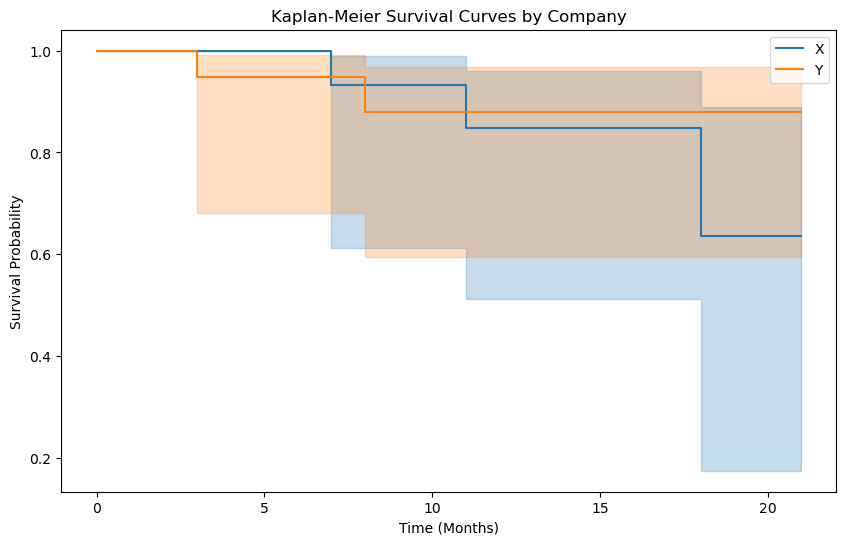

In [47]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p4_.csv')
df.head()

# 제조사별 데이터 나누기 
company_x = df[df['company']=='X']
company_y = df[df['company']=='Y']

# 생존 여부를 0과 1로 변환
mapping = {'event lost': 0, 'death': 1}
df['status_event'] = df['status'].map(mapping)

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Kaplan-Meier 생존 분석
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

# 각 회사별 생존 곡선 그리기
for company in df['company'].unique():
    company_data = df[df['company'] == company]
    kmf.fit(durations=company_data['time(month)'], event_observed=company_data['status_event'], label=company)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves by Company')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

In [48]:
# 생존 확률 계산
survival_probs = {}
time_points = [25, 35, 45]

for company in df['company'].unique():
    company_data = df[df['company'] == company]
    kmf.fit(durations=company_data['time(month)'], event_observed=company_data['status_event'])
    survival_probs[company] = {time: kmf.survival_function_at_times(time).values[0] for time in time_points}

survival_probs

from lifelines.statistics import logrank_test

# 두 회사 선택
company_x = df[df['company'] == 'X']  
company_y = df[df['company'] == 'Y']

# Log-rank 검정 수행
results = logrank_test(company_x['time(month)'], company_y['time(month)'], 
                       event_observed_X=company_x['status_event'], event_observed_Y=company_y['status_event'])

# 결과 출력
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
  event_observed_X = 0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    0
20    0
Name: status_event, dtype: int64
  event_observed_Y = 21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    1
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
Name: status_event, dtype: int64
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 1.00     -0.00

<Axes: xlabel='timeline'>

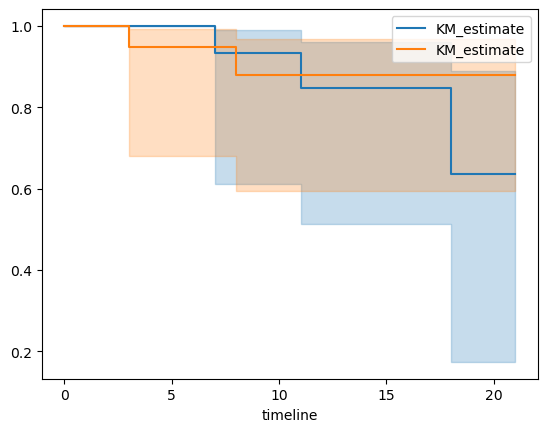

In [49]:
kmf_x = KaplanMeierFitter()
kmf_x.fit(company_x['time(month)'], company_x['status_event'])
kmf_x.plot()

kmf_y = KaplanMeierFitter()
kmf_y.fit(company_y['time(month)'], company_y['status_event'])
kmf_y.plot()

In [51]:
#  25, 30, 35 개월 불량률 계산

print("x의 25개월 후 불량률 : ", round(kmf_x.predict(25), 3))
print("x의 30개월 후 불량률 : ", round(kmf_x.predict(30), 3))
print("x의 35개월 후 불량률 : ", round(kmf_x.predict(35), 3))
print("\n")
print("y의 25개월 후 불량률 : ", round(kmf_y.predict(25), 3))
print("y의 30개월 후 불량률 : ", round(kmf_y.predict(30), 3))
print("y의 35개월 후 불량률 : ", round(kmf_y.predict(35), 3))

x의 25개월 후 불량률 :  0.636
x의 30개월 후 불량률 :  0.636
x의 35개월 후 불량률 :  0.636


y의 25개월 후 불량률 :  0.88
y의 30개월 후 불량률 :  0.88
y의 35개월 후 불량률 :  0.88


### 4-2 두 회사간 생존시간 차이를 log-rank 방식으로 검정하시오. 가설설정, 통계량, 귀무가설 기각여부 판단(10점)

In [52]:
# 로그 순위법으로 제조사별 차이 검정
from lifelines.statistics import logrank_test
logrank_test(company_x['time(month)'], company_y['time(month)'], company_x['status_event'], company_y['status_event'])

print(f"Log-rank test statistic: {results.test_statistic:.4f}")
print(f"p-value: {results.p_value:.4f}")

# 귀무가설 기각 여부 판단
alpha = 0.05  # 유의수준
if results.p_value < alpha:
    print("귀무가설을 기각합니다: 두 회사 간 생존 분포에 차이가 있습니다.")
else:
    print("귀무가설을 기각하지 않습니다: 두 회사 간 생존 분포에 차이가 없습니다.")

Log-rank test statistic: 0.0000
p-value: 1.0000
귀무가설을 기각하지 않습니다: 두 회사 간 생존 분포에 차이가 없습니다.


## 5번문제

데이터 url: https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p5_.csv

한 유저가 시식 전 물건 구매의사 유,무와 시식 후 구매의사 유,무에 대한 응답을 나타낸 데이터

{시식전} _ {구매의사 유 or 무} __ {시식후} _ {구매의사 유 or 무}

In [2]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p5_.csv ')
df.head()

,data,userId
0,시식전_유__시식후_유,user_1
1,시식전_유__시식후_유,user_2
2,시식전_유__시식후_유,user_3
3,시식전_유__시식후_유,user_4
4,시식전_유__시식후_유,user_5


In [6]:
# 'data' 컬럼을 '_' 기준으로 분리
df[['시식전 구매의사', '시식후 구매의사']] = df['data'].str.split('__', expand=True)

### 5-1 시식여부가 구매의사에 영향을 주는지 가설을 설정하시오(5점)
### 5-2 검정하고 결과를 분석하시오(5점)

In [10]:
from scipy import stats

# 귀무가설 (H0): 시식 여부는 구매 의사에 영향을 미치지 않는다.
# (즉, '시식전 구매의사'와 '시식후 구매의사' 사이에 유의미한 차이가 없다.)

# 대립가설 (H1): 시식 여부는 구매 의사에 영향을 미친다.
# (즉, '시식전 구매의사'와 '시식후 구매의사' 사이에 유의미한 차이가 있다.)

# 통계적 검정: 두 집단(시식 전과 시식 후)의 구매 의사를 비교하기 위해 t-검정 또는 Mann-Whitney U 검정을 사용할 수 있습니다.
# 시각화: 구매 의사에 대한 분포를 시각화하여 두 집단의 차이를 직관적으로 확인할 수 있습니다.

# 구매의사 값을 숫자형으로 변환
df['시식전 구매의사'] = df['시식전 구매의사'].replace({'시식전_유': 1, '시식전_무': 2})
df['시식후 구매의사'] = df['시식후 구매의사'].replace({'시식후_유': 3, '시식후_무': 4})

# t-검정 수행
t_stat, p_value = stats.ttest_ind(df['시식전 구매의사'], df['시식후 구매의사'], equal_var=False)

# 결과 출력
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# 유의수준 설정 (예: 0.05)
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 시식 여부는 구매 의사에 영향을 미칩니다.")
else:
    print("귀무가설을 채택합니다. 시식 여부는 구매 의사에 영향을 미치지 않습니다.")
    
# T-Statistic: -20.684846156212526
# P-Value: 5.439922300995882e-41
# 귀무가설을 기각합니다. 시식 여부는 구매 의사에 영향을 미칩니다.

T-Statistic: -20.684846156212526
P-Value: 5.439922300995882e-41
귀무가설을 기각합니다. 시식 여부는 구매 의사에 영향을 미칩니다.


### 6-1 A,B 지역 학생의 점수에 차이가 있는지 가설을 설정하고 정하시오 (10점) 

dataurl : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p6.csv

In [20]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p6.csv')
# df.head()
# df.info()
# df.isnull().sum()  결측치 8개 확인 모두 A지역 학교
# 결측치가 있는 모든 행 추출
df[df.isnull().any(axis=1)]

cond = df['school_name']=='A'
School_A_mean = df[cond]['score'].mean() # A지역 학교 점수의 평균 : 68.2
df = df.fillna(School_A_mean)

In [21]:
from scipy import stats

# 귀무가설 (H0): A 지역 학생의 평균 점수는 B 지역 학생의 평균 점수와 같다.
# 대립가설 (H1): A 지역 학생의 평균 점수는 B 지역 학생의 평균 점수와 다르다.
    
# A, B 지역 학생 점수 추출
scores_A = df[df['school_name'] == 'A']['score']
scores_B = df[df['school_name'] == 'B']['score']

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(scores_A, scores_B)

# 결과 출력
alpha = 0.05  # 유의 수준

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < alpha:
    print("귀무가설을 기각합니다. A와 B 지역의 평균 점수는 다릅니다.")
else:
    print("귀무가설을 채택합니다. A와 B 지역의 평균 점수는 같습니다.")
    
# T-Statistic: -3.3204
# P-Value: 0.0022
# 귀무가설을 기각합니다. A와 B 지역의 평균 점수는 다릅니다.


# 참고 : t검정값이 음수로 나오는 경우
# t검정값의 부호는 두 집단 간 평균의 차이가 어떤 방향으로 나타났는지를 나타냅니다.
# 양수의 t값: 두 집단 간에 비교하고 있는 변수의 평균이 첫 번째 집단이 두 번째 집단보다 더 큰 경우입니다.
# 음수의 t값: 두 집단 간에 비교하고 있는 변수의 평균이 두 번째 집단이 첫 번째 집단보다 더 큰 경우입니다.

T-Statistic: -3.3204
P-Value: 0.0022
귀무가설을 기각합니다. A와 B 지역의 평균 점수는 다릅니다.


데이터 출처 : https://www.kaggle.com/datasets/hangawqadir/erbil-heart-disease-dataset

데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p7.csv

연령, 몸무게,콜레스테롤 수치 데이터

In [11]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p7.csv')
df.head()

,age,Cholesterol,weight
0,65,69.0,111.0
1,54,117.0,81.0
2,61,86.2,72.0
3,57,76.0,78.0
4,62,160.0,61.0


### 7-1 몸무게를 제어한다고 생각하고, 나이와 콜레스테롤 상관계수 및 유의확률 구하라(10점)
### 7-2 상관계수를 유의수준 0.05하에서 검정하라 (5점)

In [14]:
# 몸무게를 제어하기 위해 회귀분석을 통한 잔차 계산
import statsmodels.api as sm

# 나이와 몸무게를 독립변수로 하여 콜레스테롤 수치를 종속변수로 회귀모델 적합
X = df[['weight', 'age']]
y = df['Cholesterol']

# 상수항 추가
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# 잔차 추출
residuals = model.resid

# 나이와 콜레스테롤 수치 간의 상관계수 계산
correlation_coefficient, p_value = stats.pearsonr(df['age'], residuals)

# 결과 출력
print(f"상관계수: {correlation_coefficient}")
print(f"유의확률 (p-value): {p_value}")

# 유의수준 설정
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 나이와 콜레스테롤 수치 간의 상관관계가 존재합니다.")
else:
    print("귀무가설을 채택합니다. 나이와 콜레스테롤 수치 간의 상관관계가 존재하지 않습니다.")
    
# 상관계수: 3.942159099157294e-16
# 유의확률 (p-value): 1.0000000000000588
# 귀무가설을 채택합니다. 나이와 콜레스테롤 수치 간의 상관관계가 존재하지 않습니다.

상관계수: 3.942159099157294e-16
유의확률 (p-value): 1.0000000000000588
귀무가설을 채택합니다. 나이와 콜레스테롤 수치 간의 상관관계가 존재하지 않습니다.
